In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# 3 data types in pandas: Series, DataFrame, Panel

In [ ]:
'''
Series - 1D labeled homogeneous array, holding any data type (int, string, float, Python objects, etc.)

        >>> s = pd.Series(data, index=index)
        
        data -> a scalar value, nparray, a Python dict
        Series can be passed into most NumPy methods expecting an ndarray -> ex., np.exp(s)
'''

In [34]:
# from ndarray
s1 = pd.Series(np.random.randn(5))   
# optional:
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'], name='my_series')  
s1

0   -0.557667
1    0.609912
2   -1.144051
3   -0.973750
4    0.654932
dtype: float64

In [35]:
print(s1.index)
print(s2.index)

RangeIndex(start=0, stop=5, step=1)
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [36]:
s2.name

'my_series'

In [37]:
s2 = s2.rename("different")
s2.name

'different'

In [11]:
# from dict
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [12]:
pd.Series(d, index=['b', 'f', 'd', 'a'])   # pull values only if has corresponding keys

b    1.0
f    NaN
d    NaN
a    0.0
dtype: float64

In [13]:
# from scalar value
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])    # value will be repeated to match index length

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [19]:
# slicing Series
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.495060
b   -0.737853
c    0.193541
d    0.025924
e   -0.070996
dtype: float64

In [20]:
s[[4, 3, 1]]       # s['a'], s[0], s[:3]

e   -0.070996
d    0.025924
b   -0.737853
dtype: float64

In [21]:
s.median()

-0.07099604263814803

In [22]:
s[s > s.median()]

c    0.193541
d    0.025924
dtype: float64

In [23]:
# set value
s['e'] = 12.
s

a    -0.495060
b    -0.737853
c     0.193541
d     0.025924
e    12.000000
dtype: float64

In [24]:
'e' in s

True

In [25]:
# get value specifying default
s.get('f', np.nan)

nan

In [29]:
# addition, multiplication
s + s == s * 2

a    True
b    True
c    True
d    True
e    True
dtype: bool

In [33]:
s[1:] + s[:-1]    # Series automatically align data based on label (union of the indexes)

a         NaN
b   -1.475706
c    0.387083
d    0.051849
e         NaN
dtype: float64

In [ ]:
'''
DataFrame - 2D labeled array with columns of potentially different types; a dict of Series
        
        DataFrame accepts many different kinds of input:
            Dict of 1D ndarrays, lists, dicts, or Series
            2-D numpy.ndarray
            Structured or record ndarray
            A Series
            Another DataFrame
'''

In [40]:
# from dict of Series
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [43]:
df.index, df.columns

(Index(['a', 'b', 'c', 'd'], dtype='object'),
 Index(['one', 'two'], dtype='object'))

In [41]:
pd.DataFrame(d, index=['d', 'b', 'a'])    # discard data not matching up to the passed index

one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0

In [42]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])     # discard data not matching up to the passed index & columns

two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN

In [44]:
# from dict of ndarrays / lists
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0

In [46]:
# From a list of dicts
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2, index=['first', 'second'])

a   b     c
first   1   2   NaN
second  5  10  20.0

In [47]:
# multi-indexed frame
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [48]:
# DataFrame from_items -> with the columns in a particular order
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

A  B
0  1  4
1  2  5
2  3  6

In [64]:
df = pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])], 
                        orient='index', columns=['one', 'two', 'three'])
df

one  two  three
A    1    2      3
B    4    5      6

In [65]:
df['one']

A    1
B    4
Name: one, dtype: int64

In [66]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

one  two  three   flag
A    1    2      2  False
B    4    5     20   True

In [67]:
del df['two']            # delete column
three = df.pop('three')  # delete and return column
df

one   flag
A    1  False
B    4   True

In [69]:
df['foo'] = 'bar'     # scalar value will be propagated to fill the column
df

one   flag  foo
A    1  False  bar
B    4   True  bar

In [72]:
df['one_trunc'] = df['one'][:1]     # inserting a Series that does not have the same index
df

one   flag  foo  one_trunc
A    1  False  bar        1.0
B    4   True  bar        NaN

In [73]:
# insert column at any location
df.insert(1, 'copy_one', df['one'])
df

one  copy_one   flag  foo  one_trunc
A    1         1  False  bar        1.0
B    4         4   True  bar        NaN

In [104]:
# read .csv file into a dataframe
# file has no header; not using first column as indices
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, 
                   index_col=False, names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2

In [105]:
# assign -> create new columns that are potentially derived from existing columns
# assign -> returns a copy of the data, leaving the original DataFrame untouched

iris.assign(SepalRatio = iris['SepalWidth'] / iris['SepalLength']).head()

SepalLength  SepalWidth  PetalLength  PetalWidth  SepalRatio
0          5.1         3.5          1.4         0.2    0.686275
1          4.9         3.0          1.4         0.2    0.612245
2          4.7         3.2          1.3         0.2    0.680851
3          4.6         3.1          1.5         0.2    0.673913
4          5.0         3.6          1.4         0.2    0.720000

In [106]:
iris.assign(sepal_ratio = lambda x: (x['SepalWidth'] / x['SepalLength'])).head()   # using assign & lambda

SepalLength  SepalWidth  PetalLength  PetalWidth  sepal_ratio
0          5.1         3.5          1.4         0.2     0.686275
1          4.9         3.0          1.4         0.2     0.612245
2          4.7         3.2          1.3         0.2     0.680851
3          4.6         3.1          1.5         0.2     0.673913
4          5.0         3.6          1.4         0.2     0.720000

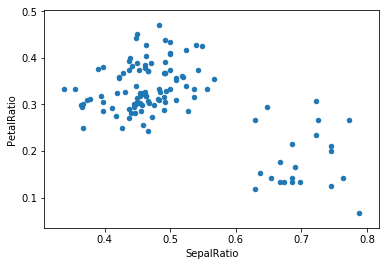

In [111]:
# using lambda when no reference to df is available (calculations happen on filtered df)

(iris.query('SepalLength > 5').assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
                                      PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
 .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro
# https://pandas.pydata.org/pandas-docs/stable/10min.html#min
# https://pandas.pydata.org/pandas-docs/stable/tutorials.html